Accuracy: 0.97


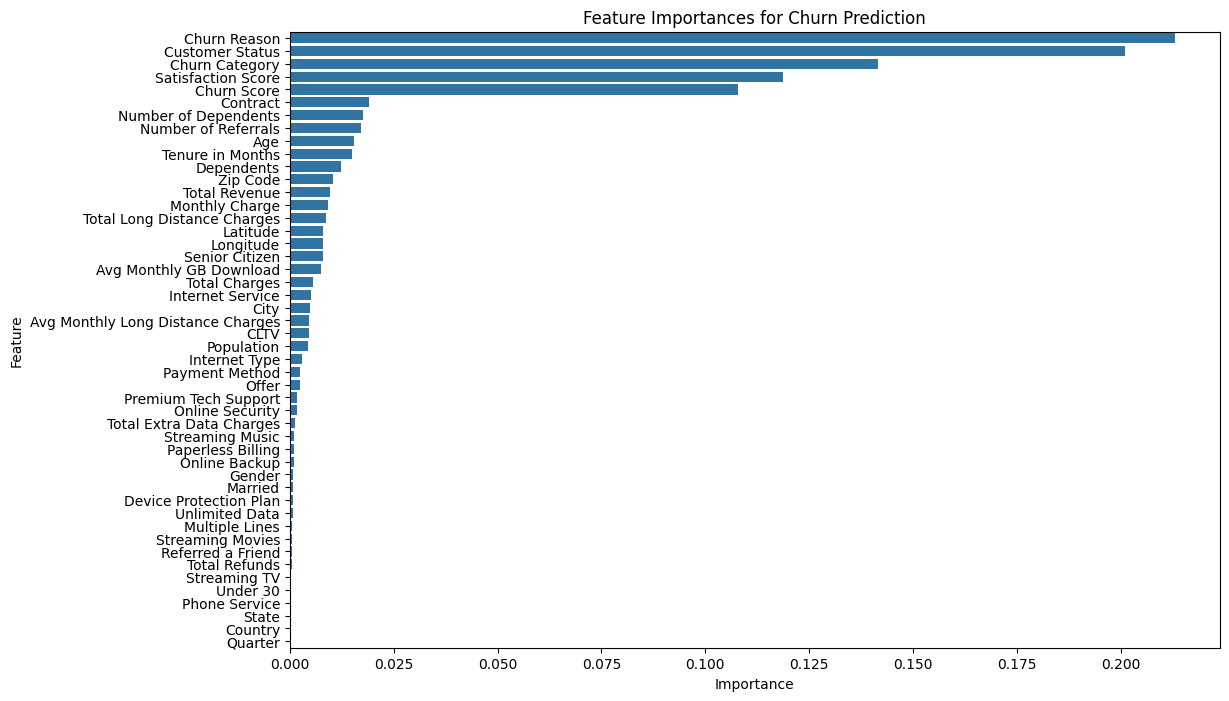

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = '/content/drive/MyDrive/telcom_m.csv'
df = pd.read_csv(file_path)

# Drop the 'Customer ID' column as it is not useful for prediction
df.drop(columns=['Customer ID'], inplace=True)

# Encode categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Define features (X) and target (y)
X = df.drop(columns=['Churn Label'])
y = df['Churn Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Get feature importances
feature_importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)

plt.title('Feature Importances for Churn Prediction')
plt.show()




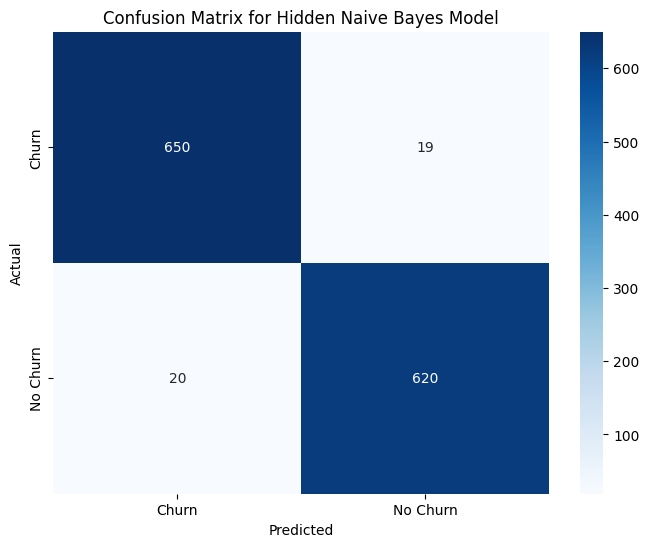

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix data
confusion_matrix = np.array([[650, 19], [20, 620]])

# Labels for the axes
labels = ['Churn', 'No Churn']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add titles and labels
plt.title('Confusion Matrix for Hidden Naive Bayes Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# displaying thr importance features

In [ ]:
importance_df.head(10)

,Feature,Importance
47,Churn Reason,0.213144
43,Customer Status,0.200950
46,Churn Category,0.141667
42,Satisfaction Score,0.118581
44,Churn Score,0.107940
33,Contract,0.019021
6,Number of Dependents,0.017584
16,Number of Referrals,0.017152
1,Age,0.015401
17,Tenure in Months,0.015064


In [ ]:
data = importance_df[importance_df['Importance'] > 0.01]

In [ ]:
data

,Feature,Importance
47,Churn Reason,0.213144
43,Customer Status,0.200950
46,Churn Category,0.141667
42,Satisfaction Score,0.118581
44,Churn Score,0.107940
33,Contract,0.019021
6,Number of Dependents,0.017584
16,Number of Referrals,0.017152
1,Age,0.015401
17,Tenure in Months,0.015064


In [ ]:
hidden_df = df[['Contract', 'Number of Referrals']]

hidden_features =['Contract', 'Number of Referrals']

In [ ]:
hidden_df.head()

,Contract,Number of Referrals
0,0,0
1,0,1
2,0,0
3,0,1
4,0,1


In [ ]:
X = df[data['Feature']]

In [ ]:
X.head()

,Churn Reason,Customer Status,Churn Category,Satisfaction Score,Churn Score,Contract,Number of Dependents,Number of Referrals,Age,Tenure in Months,Dependents,Zip Code
0,5,0,1,3,91,0,0,0,78,1,0,90022
1,3,0,1,3,69,0,1,1,74,8,1,90063
2,3,0,1,2,81,0,3,0,71,18,1,90065
3,11,0,2,2,88,0,1,1,78,25,1,90303
4,8,0,4,2,67,0,1,1,80,37,1,90602


# hidden Navie bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train_hidden = X_train.copy()
X_train_hidden[hidden_features] = hidden_df[hidden_features]

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_hidden, y_train)

# Predict on test set
X_test_hidden = X_test.copy()
X_test_hidden[hidden_features] = hidden_df[hidden_features]

y_pred = nb_model.predict(X_test_hidden)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Model Accuracy: 0.9702062643239114
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       640
           1       0.98      0.97      0.97       669

    accuracy                           0.97      1309
   macro avg       0.97      0.97      0.97      1309
weighted avg       0.97      0.97      0.97      1309

